In [1]:
!pip install librosa

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

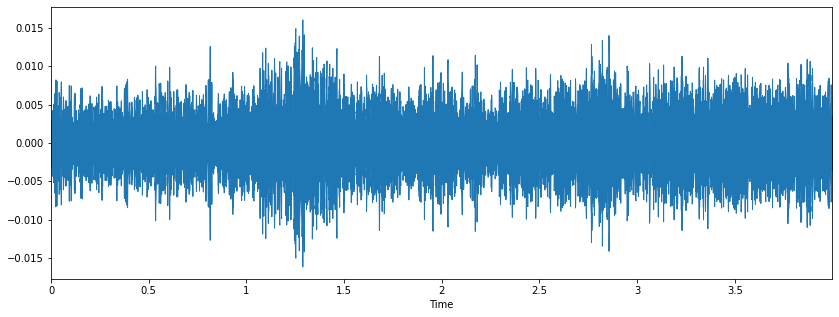

In [4]:
filename='/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold5/100263-2-0-121.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
data

array([-0.00270751, -0.00303302, -0.00159557, ..., -0.0012889 ,
       -0.00184731, -0.00210062], dtype=float32)

In [8]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [9]:
metadata['class'].value_counts()

dog_bark            1000
drilling            1000
engine_idling       1000
children_playing    1000
jackhammer          1000
street_music        1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# **Three takeways from the above EDA**

1. Librosa converts mono and stereo channel to only mono signal.
2. Librosa read the data at a sample rate of 22050 Hz.
3. Librosa normalizes the data between -1 to 1.

In [10]:
import librosa
audio_file_path='/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold5/100032-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [11]:
librosa_audio_data

array([-0.00346022, -0.00502555, -0.00465325, ..., -0.00248061,
       -0.00155105, -0.0003528 ], dtype=float32)

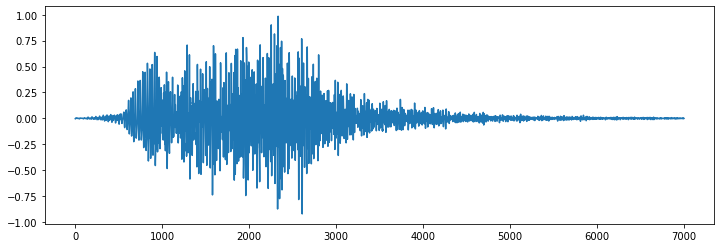

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [13]:
from scipy.io import wavfile as wav # Using scipy instead of librosa
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [14]:
wave_audio

array([[-150, -148],
       [-160, -157],
       [-151, -151],
       ...,
       [ -19,  -24],
       [ -14,  -18],
       [   1,   -1]], dtype=int16)

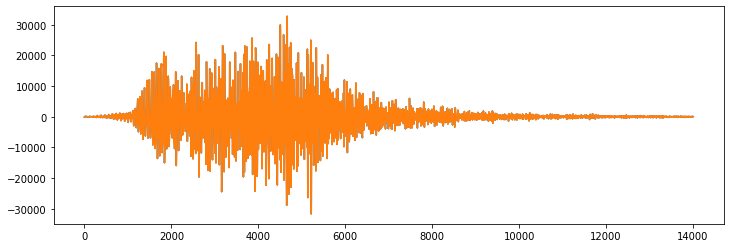

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# **Feature Extraction**

In [16]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
mfccs.shape

(40, 14)

In [17]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [19]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [20:11,  3.12it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [46:04,  3.66it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [46:04,  3.76it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [48:15,  3.02it/s]


In [20]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [63]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [64]:
X.shape, y.shape

((8732, 40), (8732,))

In [65]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [66]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [67]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [70]:
num_labels=y.shape[1]

model=Sequential()
model.add(Dense(128,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5248      
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [71]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

Epoch 1/500
181/191 [===========================>..] - ETA: 0s - loss: 10.7284 - accuracy: 0.1597
Epoch 00001: val_loss improved from inf to 1.96950, saving model to /content/audio_classification.hdf5
191/191 [==============================] - 2s 7ms/step - loss: 10.3448 - accuracy: 0.1625 - val_loss: 1.9695 - val_accuracy: 0.3294
Epoch 2/500
188/191 [============================>.] - ETA: 0s - loss: 2.7954 - accuracy: 0.2131
Epoch 00002: val_loss improved from 1.96950 to 1.96205, saving model to /content/audio_classification.hdf5
191/191 [==============================] - 1s 6ms/step - loss: 2.7854 - accuracy: 0.2150 - val_loss: 1.9620 - val_accuracy: 0.3565
Epoch 3/500
183/191 [===========================>..] - ETA: 0s - loss: 2.1849 - accuracy: 0.2596
Epoch 00003: val_loss improved from 1.96205 to 1.87805, saving model to /content/audio_classification.hdf5
191/191 [==============================] - 1s 6ms/step - loss: 2.1834 - accuracy: 0.2590 - val_loss: 1.8781 - val_accuracy: 0.42

In [73]:
filename="/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold2/100652-3-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)

[-2.75891418e+02  1.01743202e+02 -9.10168152e+01 -4.60302925e+00
 -1.90497160e-01 -1.27953682e+01 -1.72797413e+01  3.27343678e+00
 -9.62572384e+00  1.53799124e+01  8.93755531e+00  1.23543510e+01
  1.44384408e+00  2.08109021e+00 -6.14473581e+00  2.81045365e+00
  3.32731009e+00  1.67760205e+00 -1.31505954e+00  8.03713608e+00
  6.12787056e+00  1.09663084e-01  5.46013594e+00 -1.03232674e-01
 -1.36195469e+00  4.34712458e+00  6.06002629e-01  2.46103120e+00
  2.55537724e+00  6.58671200e-01  4.74422979e+00  1.27336693e+00
 -1.08048689e+00  6.34698689e-01  1.83935905e+00  1.78452539e+00
  2.03715777e+00  9.70959961e-02  2.67303443e+00  8.53360236e-01]


In [74]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[[-2.75891418e+02  1.01743202e+02 -9.10168152e+01 -4.60302925e+00
  -1.90497160e-01 -1.27953682e+01 -1.72797413e+01  3.27343678e+00
  -9.62572384e+00  1.53799124e+01  8.93755531e+00  1.23543510e+01
   1.44384408e+00  2.08109021e+00 -6.14473581e+00  2.81045365e+00
   3.32731009e+00  1.67760205e+00 -1.31505954e+00  8.03713608e+00
   6.12787056e+00  1.09663084e-01  5.46013594e+00 -1.03232674e-01
  -1.36195469e+00  4.34712458e+00  6.06002629e-01  2.46103120e+00
   2.55537724e+00  6.58671200e-01  4.74422979e+00  1.27336693e+00
  -1.08048689e+00  6.34698689e-01  1.83935905e+00  1.78452539e+00
   2.03715777e+00  9.70959961e-02  2.67303443e+00  8.53360236e-01]]
(1, 40)


In [75]:
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)

[[3.0751700e-05 1.3100782e-03 3.7680916e-02 8.2820898e-01 2.7075270e-03
  1.6991928e-04 1.1339733e-01 5.0882483e-07 2.7725059e-03 1.3721536e-02]]


In [80]:
filename="/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold2/100652-3-0-0.wav"
prediction_feature = features_extractor(filename)

In [81]:
prediction_feature

array([-3.1593384e+02,  9.5675888e+01, -3.8047768e+01,  4.7500740e+01,
       -7.3586011e+00,  1.0455470e+01, -1.8447603e+00,  1.8642925e+01,
       -1.1789134e+01,  7.2919984e+00, -7.3276439e+00,  1.0661768e+01,
       -1.4730461e+01,  2.3039916e+00, -1.0813205e+01,  5.0486927e+00,
       -4.1896582e+00,  1.9373505e+01,  9.9117839e-01,  4.5830026e+00,
       -1.0203203e+01,  1.4952719e+00, -8.8648930e+00,  7.1252313e+00,
        2.8728654e+00,  1.5023614e+00, -1.3836695e+01,  3.0785382e-01,
        4.4619193e+00,  2.4852614e+00, -1.1666129e+01, -3.5005753e+00,
        4.0923743e+00,  8.7135029e+00,  1.1072226e+00,  3.0423386e+00,
        2.5794456e+00,  5.7758051e-01, -1.1463765e+01, -5.9653535e+00],
      dtype=float32)

In [82]:
prediction_feature = prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

array([[0.01876819, 0.36524078, 0.12895998, 0.06940255, 0.02056367,
        0.0798179 , 0.00520648, 0.00729989, 0.01602741, 0.28871307]],
      dtype=float32)